In [47]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.io import wavfile
import librosa
import soundfile as sf
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [229]:
#alternative beta_loss: beta_loss='kullback_leibler' or beta_loss='itakura-saito'
#alternative solver: solver='mu'

In [2]:
# take a signal as input, take the magnitude of the STFT of the signal, use the librosa decompose function which in turn uses the scikit-learn NMF decomposition
# function with paramaters modified as you see fit, then takes the dot product of the components and activations to reconstruct the signal into a spectrogram
# then take the ISTFT to convert the spectrogram back to the temporal domain and write the .wav file.

# Function takes a signal and parameters as input and ouputs the reconstructed signal, a spectrogram of the signal, and the waveform of the signal 

def NMF_process(y, sr, filename, n_components=16, n_fft=2048, beta_loss='frobenius', solver='cd', max_iter=1000, save_dir='libNMF/'):
    S = np.abs(librosa.stft(y, n_fft=n_fft))

    comps, acts = librosa.decompose.decompose(S, sort=True, max_iter=max_iter, beta_loss=beta_loss, solver=solver, n_components=n_components)

    # S_approx = comps.dot(acts) 

    # outWave = librosa.istft(S_approx) #convert back to temporal domain

    # wavfile.write(f"{save_dir}{filename}_{n_components}_{solver}_{beta_loss}.wav", sr, outWave)

    # plt.figure(figsize=(10, 4))
    # img = librosa.display.specshow(librosa.amplitude_to_db(S_approx,
    #                                                    ref=np.max),
    #                            y_axis='log', x_axis='time')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('NMF Reconstructed Spectrogram')
    # plt.savefig(f"{save_dir}{filename}_{n_components}_{solver}_{beta_loss}.png")
    # plt.close()

    # plt.figure(figsize=(10, 4))
    # wav = librosa.display.waveshow(outWave, sr=sr)
    # plt.title('NMF Reconstructed Waveform')
    # plt.savefig(f"{save_dir}{filename}_{n_components}_{solver}_{beta_loss}_wave.png")
    # plt.close()

    return comps, acts

In [3]:
#plot each component, activation, and magnitude spectrum of each component and save to a file
def plot_comps_acts(comps, acts, sr, save_dir, filename):
    # Plot components as waveforms
    num_comps = comps.shape[1]
    plt.figure(figsize=(15, 2 * num_comps))
    for i in range(num_comps):
        plt.subplot(num_comps, 1, i + 1)
        plt.plot(comps[:, i])
        plt.title(f'Component {i + 1}')
        plt.xlabel('Frequency Bins')
        plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.savefig(f"{save_dir}{filename}_components_waveforms.png")
    plt.close()

    # Plot activations as individual waveforms
    num_acts = acts.shape[0]
    plt.figure(figsize=(15, 2 * num_acts))
    for i in range(num_acts):
        plt.subplot(num_acts, 1, i + 1)
        plt.plot(acts[i])
        plt.title(f'Activation {i + 1}')
        plt.xlabel('Time Frames')
        plt.ylabel('Activation Strength')
    plt.tight_layout()
    plt.savefig(f"{save_dir}{filename}_activations_waveforms.png")
    plt.close()

        # Example code to plot magnitude spectrum of components
    plt.figure(figsize=(15, 2 * num_comps))
    for i in range(num_comps):
        plt.subplot(num_comps, 1, i + 1)
        plt.plot(np.abs(np.fft.fft(comps[:, i])))
        plt.title(f'Component {i + 1} Magnitude Spectrum')
        plt.xlabel('Frequency Bins')
        plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.savefig(f"{save_dir}{filename}_mag_spectrum.png")
    plt.close()



In [4]:
#function that combines the specified components and writes the wav file
def combine_components(comps, acts, component_indices, filename):
    # Choose components and activations based on specified indices
    source_components = comps[:, component_indices]
    source_activations = acts[component_indices, :]
    
    # Reconstruct the spectrogram by combining selected components and activations
    S_approx = source_components.dot(source_activations)
    
    # Convert back to waveform
    outWave = librosa.istft(S_approx)
    
    # Write output to file
    wavfile.write(filename, sr, outWave)

    return outWave

In [5]:
os.chdir(f'/Users/griffineychner/AFRL_2024/originalData/')

In [6]:
filename='d305sA2r06p0420210826.wav'

In [7]:
y,sr = librosa.load(filename)

In [8]:
S = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=1024)))

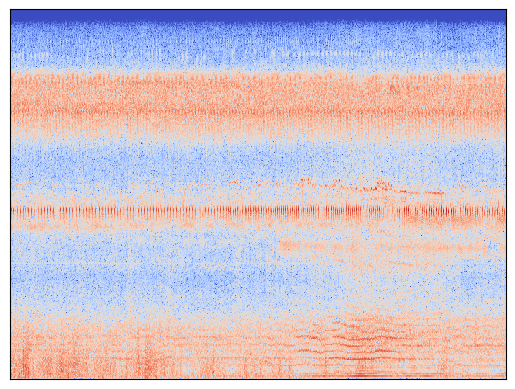

In [9]:
librosa.display.specshow(S)

In [54]:
S.shape

(513, 5168)

In [44]:
comps, acts = NMF_process(y, sr, filename, n_components=8, solver='cd', max_iter=2000)

In [15]:
plot_comps_acts(comps, acts, sr, save_dir='./', filename=filename)

In [50]:
#choose indices to combine
idx = [4, 5]

In [42]:
out = combine_components(comps, acts, idx, filename='./idx2.wav')

In [238]:
components = [16, 32, 64, 128, 256]

In [242]:
#if you want to loop and check the output for different amounts of components
for i in components:
 NMF_process(y, sr, filename, n_components=i, solver='mu', beta_loss='itakura-saito', max_iter=2000)